In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import matplotlib.pyplot as plt

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'train'
valid_path = 'val'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False


# useful for getting number of output classes
folders = glob('train/*')

# our layers - you can add more if you want
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)


# view the structure of the model
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 111, 111,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 111, 111,  │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 109, 109,  │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 109, 109,  │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 54, 54,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 54, 54,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 52, 52,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 22,007,588 (83.95 MB)

 Trainable params: 204,804 (800.02 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
len(folders)

4

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.8747 - loss: 0.6994 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 2/20


C:\Users\aksha\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.9014 - loss: 0.6918 - val_accuracy: 0.9444 - val_loss: 0.0453
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.8966 - loss: 0.6649 - val_accuracy: 0.9444 - val_loss: 0.0934
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 178s 3s/step - accuracy: 0.9295 - loss: 0.5599 - val_accuracy: 0.7222 - val_loss: 0.8699
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 

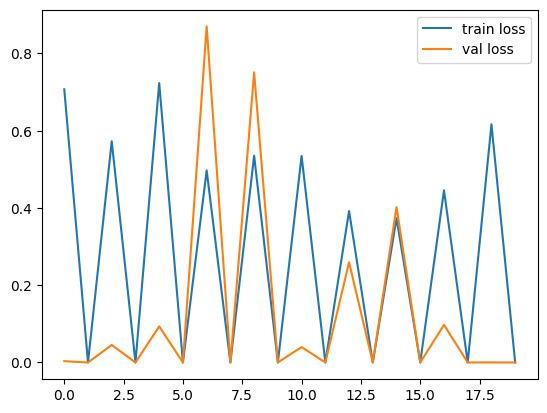

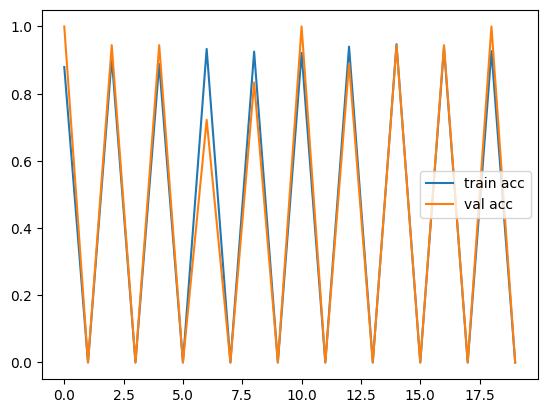

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:
y_pred = model.predict(test_set)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [ ]:
y_pred

array([[8.16580440e-33, 1.00000000e+00, 0.00000000e+00, 8.45234805e-32],
       [2.16899371e-19, 2.40597896e-14, 2.62372453e-13, 1.00000000e+00],
       [8.13626594e-22, 9.95765448e-01, 8.77637074e-10, 4.23455425e-03],
       [9.99998450e-01, 1.50781398e-06, 4.12827862e-11, 1.47549626e-08],
       [7.57578458e-28, 1.00000000e+00, 2.19229508e-14, 8.16116397e-10],
       [1.30411073e-24, 4.87130807e-38, 1.00000000e+00, 4.91723084e-25],
       [7.32088446e-21, 3.96673203e-20, 1.00000000e+00, 3.98152822e-20],
       [8.77299982e-18, 7.21842070e-20, 9.99999762e-01, 1.88738269e-07],
       [4.58585698e-13, 8.74092165e-28, 1.00000000e+00, 2.92727641e-14],
       [1.00000000e+00, 9.50737499e-30, 3.11412146e-10, 2.48027732e-09],
       [1.20192858e-27, 5.70764258e-15, 6.96870909e-21, 1.00000000e+00],
       [4.74662838e-37, 1.00000000e+00, 6.68684205e-17, 3.08675820e-22],
       [7.98345195e-28, 1.50675553e-21, 5.22788312e-16, 1.00000000e+00],
       [1.00000000e+00, 4.70581706e-19, 1.94487482e

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def preprocess_image(image_path):
  """Loads and preprocesses an image for the Inception model."""
  # Assuming your target image size is 224x224 (common for InceptionV3)
  target_size = (224, 224)

  # Load the image
  img = load_img(image_path, target_size=target_size)

  # Convert to a NumPy array
  img_array = img_to_array(img)

  # Rescale values to be between 0 and 1 (common for InceptionV3)
  img_array = img_array / 255.0

  # Expand dimensions for the model (batch size of 1)
  return np.expand_dims(img_array, axis=0)

In [ ]:
from tensorflow.keras.models import load_model

# Load the pre-trained model with frozen weights
inception = load_model('model_inception.h5', compile=False)

# Preprocess your new image (replace with your preprocessing logic)
new_image_path = "leaf disease\test\diseased cotton leaf\dis_leaf (248).jpg"
new_image = preprocess_image(new_image_path)

# Make prediction
predictions = inception.predict(new_image)
#print(predictions)
# Access the most likely class
predicted_class = np.argmax(predictions[0])

print(f"Predicted class: {predicted_class}")

# Define a dictionary to map predicted class to labels
label_map = {
    0: "Diseased cotton leaf",
    1: "Diseased cotton leaf",
    2: "Fresh cotton leaf",
    3: "Fresh cotton leaf"
}

# Check the predicted class and print corresponding label
if predicted_class in label_map:
    print(label_map[predicted_class])
else:
    print("Unknown class")

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\aksha\AppData\Local\Temp\ipykernel_17844\3410853102.py:7: SyntaxWarning: invalid escape sequence '\d'
  new_image_path = "leaf disease\test\diseased cotton leaf\dis_leaf (248).jpg"
C:\Users\aksha\AppData\Local\Temp\ipykernel_17844\3410853102.py:7: SyntaxWarning: invalid escape sequence '\d'
  new_image_path = "leaf disease\test\diseased cotton leaf\dis_leaf (248).jpg"


OSError: [Errno 22] Invalid argument: 'leaf disease\test\\diseased cotton leaf\\dis_leaf (248).jpg'